In [93]:
#Importing  Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from prophet import Prophet

Step 1: Loading Dataset

In [94]:
df=pd.read_csv("Expenses.csv")

Displaying  basic information

In [95]:
print("✅ Dataset Loaded ")
print(df.head(20))

✅ Dataset Loaded 
          Date       Category          Description Payment_Mode  Amount (INR)  \
0   01-01-2015           Food           Restaurant         Cash       1463.46   
1   01-01-2015  Entertainment        Movie Tickets  Net Banking       3020.42   
2   01-01-2015         Health             Medicine  Credit Card       2811.87   
3   02-01-2015  Miscellaneous  Stationery Purchase          UPI       4708.96   
4   02-01-2015  Entertainment        Movie Tickets  Net Banking        450.34   
5   02-01-2015           Food            Fast Food         Cash       4443.06   
6   03-01-2015      Transport             Bus Fare  Credit Card       1293.85   
7   03-01-2015           Food   Lunch with Friends   Debit Card       4709.45   
8   03-01-2015  Entertainment         Concert Pass   Debit Card        982.84   
9   03-01-2015  Miscellaneous                 Gift  Net Banking       1536.18   
10  04-01-2015       Shopping        Mall Shopping  Net Banking        344.15   
11  04-01-

In [96]:
df.head()

,Date,Category,Description,Payment_Mode,Amount (INR),User_ID,Month,Year
0,01-01-2015,Food,Restaurant,Cash,1463.46,U006,Jan,2015
1,01-01-2015,Entertainment,Movie Tickets,Net Banking,3020.42,U001,Jan,2015
2,01-01-2015,Health,Medicine,Credit Card,2811.87,U006,Jan,2015
3,02-01-2015,Miscellaneous,Stationery Purchase,UPI,4708.96,U003,Jan,2015
4,02-01-2015,Entertainment,Movie Tickets,Net Banking,450.34,U004,Jan,2015


In [97]:
df.tail()

,Date,Category,Description,Payment_Mode,Amount (INR),User_ID,Month,Year
10096,30-12-2025,Groceries,Reliance Fresh,UPI,4258.86,U002,Dec,2025
10097,30-12-2025,Groceries,Reliance Fresh,UPI,1238.94,U001,Dec,2025
10098,30-12-2025,Bills,Electricity Bill,Credit Card,3713.47,U007,Dec,2025
10099,31-12-2025,Miscellaneous,Gift,UPI,2691.21,U003,Dec,2025
10100,31-12-2025,Transport,Uber Ride,Cash,4814.13,U006,Dec,2025


In [59]:
df.describe()

,Amount (INR),Year
count,10101.000000,10101.000000
mean,2560.644489,2020.002277
std,1412.255612,3.154801
min,100.130000,2015.000000
25%,1334.050000,2017.000000
50%,2567.100000,2020.000000
75%,3791.360000,2023.000000
max,4999.040000,2025.000000


In [98]:
df.shape

(10101, 8)

In [99]:
df.size

80808

In [100]:
df.columns.tolist()

['Date',
 'Category',
 'Description',
 'Payment_Mode',
 'Amount (INR)',
 'User_ID',
 'Month',
 'Year']

In [101]:
df.nunique()

,0
Date,4018
Category,8
Description,33
Payment_Mode,5
Amount (INR),10005
User_ID,10
Month,12
Year,11


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10101 entries, 0 to 10100
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10101 non-null  object 
 1   Category      10101 non-null  object 
 2   Description   10101 non-null  object 
 3   Payment_Mode  10101 non-null  object 
 4   Amount (INR)  10101 non-null  float64
 5   User_ID       10101 non-null  object 
 6   Month         10101 non-null  object 
 7   Year          10101 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 631.4+ KB


In [103]:
df.columns

Index(['Date', 'Category', 'Description', 'Payment_Mode', 'Amount (INR)',
       'User_ID', 'Month', 'Year'],
      dtype='object')

Step 2: Data Preprocessing

In [114]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [113]:

# Extract Year and Month as numeric
df['YearMonth'] = df['Date'].dt.to_period('M')


In [67]:

df.isnull().sum()

,0
Date,0
Category,0
Description,0
Payment_Mode,0
Amount (INR),0
User_ID,0
Month,0
Year,0


In [80]:
# Aggregate total monthly expense (for all users)
monthly_expenses = df.groupby('YearMonth')['Amount (INR)'].sum().reset_index()
monthly_expenses['YearMonth'] = monthly_expenses['YearMonth'].astype(str)

In [81]:
# Convert YearMonth to numerical feature
monthly_expenses['Month_Index'] = range(1, len(monthly_expenses) + 1)


In [82]:
print("\n📊 Monthly Expense Data:")
print(monthly_expenses.head())


📊 Monthly Expense Data:
  YearMonth  Amount (INR)  Month_Index
0   2015-01     225211.28            1
1   2015-02     149706.08            2
2   2015-03     218061.58            3
3   2015-04     177272.02            4
4   2015-05     214222.57            5


 Step 3: Prepare Data for ML Model

In [83]:
X = monthly_expenses[['Month_Index']]
y = monthly_expenses['Amount (INR)']

In [84]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


Step 4: Train Linear Regression Model

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 5: Forecast Future Expenses

In [86]:
# Predict on test data
y_pred = model.predict(X_test)

In [87]:
# Forecast for next 12 months
future_months = pd.DataFrame({'Month_Index': range(len(monthly_expenses) + 1, len(monthly_expenses) + 13)})
future_predictions = model.predict(future_months)

 Step 6: Evaluate Model

In [88]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n📈 Model Performance:")
print(f"Mean Absolute Error: ₹{mae:.2f}")
print(f"R² Score: {r2:.3f}")


📈 Model Performance:
Mean Absolute Error: ₹14925.54
R² Score: -0.103


 Step 7: Visualization

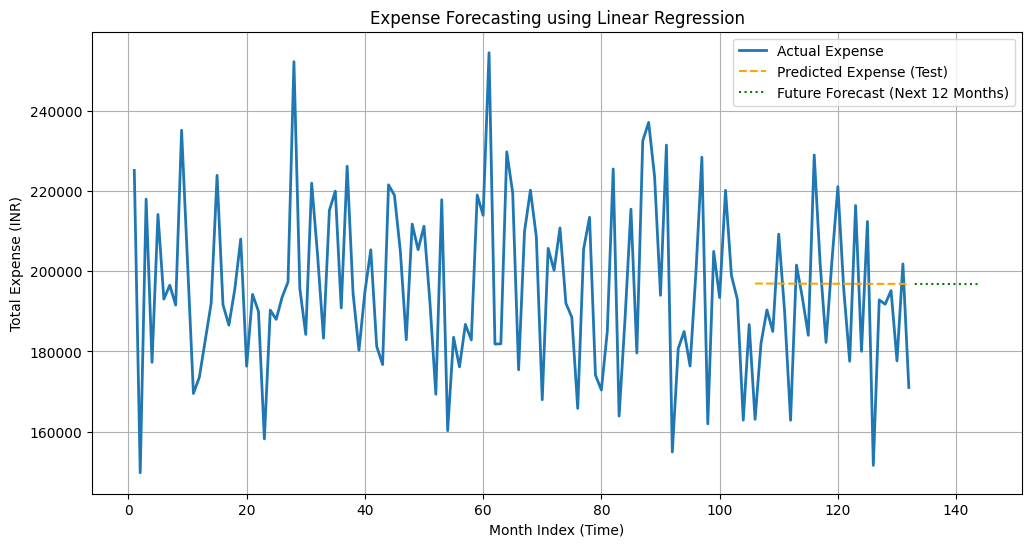

In [91]:
plt.figure(figsize=(12,6))
plt.plot(monthly_expenses['Month_Index'], y, label='Actual Expense', linewidth=2)
plt.plot(X_test['Month_Index'], y_pred, label='Predicted Expense (Test)', linestyle='--', color='orange')
plt.plot(future_months['Month_Index'], future_predictions, label='Future Forecast (Next 12 Months)', linestyle=':', color='green')
plt.title("Expense Forecasting using Linear Regression")
plt.xlabel("Month Index (Time)")
plt.ylabel("Total Expense (INR)")
plt.legend()
plt.grid(True)
plt.show()

 Step 8: Display Future Predictions


In [90]:
future_df = pd.DataFrame({
    'Future_Month_Index': future_months['Month_Index'],
    'Predicted_Expense(INR)': future_predictions.round(2)
})
print("\n🔮 Forecasted Expenses for Next 12 Months:")
print(future_df)


🔮 Forecasted Expenses for Next 12 Months:
    Future_Month_Index  Predicted_Expense(INR)
0                  133               196855.11
1                  134               196851.19
2                  135               196847.27
3                  136               196843.34
4                  137               196839.42
5                  138               196835.49
6                  139               196831.57
7                  140               196827.65
8                  141               196823.72
9                  142               196819.80
10                 143               196815.87
11                 144               196811.95
